First run in the terminal:
```
 python whamp_wrapper.py
```
This will execute the script and run the WHAMP model with the specified parameters, including a parameter sweep for different A values.

In [16]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Cell 2: Read the WHAMP output file with proper parsing
def read_whamp_output(filename):
    """
    Read WHAMP output data from text file into a pandas DataFrame.
    
    Parameters:
    filename: path to the text file containing WHAMP output
    
    Returns:
    DataFrame with columns extracted from the WHAMP output format
    """
    try:
        data = []
        
        with open(filename, 'r') as file:
            for line in file:
                line = line.strip()
                if not line:  # Skip empty lines
                    continue
                
                # Initialize row data
                row = {}
                
                # Extract p value - more specific pattern
                p_match = re.search(r'p=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if p_match:
                    row['p'] = float(p_match.group(1))
                
                # Extract z value - more specific pattern
                z_match = re.search(r'z=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if z_match:
                    row['z'] = float(z_match.group(1))
                
                # Extract f (frequency) - handle scientific notation properly
                # Pattern: f= number number (where numbers can be in scientific notation)
                f_match = re.search(r'f=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s+([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if f_match:
                    row['omega_r'] = float(f_match.group(1))
                    row['omega_i'] = float(f_match.group(2))
                
                # Extract EX (electric field X component) - handle spacing properly
                ex_match = re.search(r'EX=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s+([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if ex_match:
                    row['EX_real'] = float(ex_match.group(1))
                    row['EX_imag'] = float(ex_match.group(2))
                
                # Extract EY (electric field Y component)
                ey_match = re.search(r'EY=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s+([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if ey_match:
                    row['EY_real'] = float(ey_match.group(1))
                    row['EY_imag'] = float(ey_match.group(2))
                
                # Extract EZ (electric field Z component)
                ez_match = re.search(r'EZ=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s+([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if ez_match:
                    row['EZ_real'] = float(ez_match.group(1))
                    row['EZ_imag'] = float(ez_match.group(2))
                
                # Extract BETA - handle scientific notation
                beta_match = re.search(r'BETA=([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)', line)
                if beta_match:
                    row['BETA'] = float(beta_match.group(1))
                
                # Extract A (alpha parameter) - more specific pattern to avoid matching BETA
                a_match = re.search(r'A=\s*([-+]?\d*\.?\d+(?:[eE][-+]?\d+)?)\s*$', line)
                if a_match:
                    row['A'] = float(a_match.group(1))
                
                # Only add row if we found at least p, z, and frequency data
                if 'p' in row and 'z' in row and 'omega_r' in row:
                    data.append(row)
        
        # Create DataFrame
        df = pd.DataFrame(data)
        
        return df
        
    except Exception as e:
        print(f"Error reading file: {e}")
        return None

# Cell 3: Load your data
filename = '/Users/u0167590/github/whamp/results/parallel_firehose_sweep.txt'
df = read_whamp_output(filename)
# Display basic info about the data
if df is not None:
    print(f"Data loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"\nColumn names: {list(df.columns)}")
    print(f"\nUnique A values: {sorted(df['A'].unique())}")
    print(f"\nUnique BETA values: {sorted(df['BETA'].unique())}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    # Group by A value to see data structure
    print(f"\nData grouped by A value:")
    for beta_val in sorted(df['BETA'].unique()):
        print(f"\nBETA = {beta_val}:")
        for a_val in sorted(df['A'].unique()):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            print(f"A = {a_val}, BETA = {beta_val}: {len(subset)} data points")
else:
    print("Failed to load data")

Data loaded successfully!
Shape: (366, 12)

Column names: ['p', 'z', 'omega_r', 'omega_i', 'EX_real', 'EX_imag', 'EY_real', 'EY_imag', 'EZ_real', 'EZ_imag', 'BETA', 'A']

Unique A values: [np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.49), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9), np.float64(1.0)]

Unique BETA values: [np.float64(4.0), np.float64(16.0), np.float64(36.0), np.float64(64.0)]

First few rows:
     p    z   omega_r  omega_i  EX_real  EX_imag  EY_real  EY_imag  EZ_real  \
0  0.0  1.0  0.595705   0.0599   0.7071      0.0     -0.0   0.7071     -0.0   
1  0.0  0.9  0.505172   0.0717   0.7071      0.0      0.0   0.7071      0.0   
2  0.0  0.8  0.416721   0.0815   0.7071      0.0      0.0   0.7071      0.0   
3  0.0  0.7  0.330443   0.0881   0.7071      0.0      0.0   0.7071     -0.0   
4  0.0  0.6  0.246883   0.0896   0.7071      0.0     -0.0   0.7071     -0.0   

   EZ_imag  BETA     A  
0     -0.0   

In [17]:
df[df['omega_r'] > 1]

,p,z,omega_r,omega_i,EX_real,EX_imag,EY_real,EY_imag,EZ_real,EZ_imag,BETA,A
162,0.0,1.0,1660607.3,-1.180000e-08,0.0,0.0,-0.0,-0.0,1.0,0.0,16.0,0.8
163,0.0,0.9,1660607.3,-8.850000e-09,0.0,0.0,-0.0,-0.0,1.0,0.0,16.0,0.8
164,0.0,0.8,1660607.3,-8.900000e-09,-0.0,-0.0,0.0,0.0,1.0,0.0,16.0,0.8
165,0.0,0.7,1660607.3,2.340000e-08,-0.0,0.0,0.0,-0.0,1.0,0.0,16.0,0.8
166,0.0,0.6,1660607.3,2.050000e-08,-0.0,0.0,0.0,-0.0,1.0,0.0,16.0,0.8
167,0.0,0.5,1660607.3,-6.270000e-14,0.0,0.0,0.0,-0.0,1.0,0.0,16.0,0.8
168,0.0,0.4,1660607.3,6.630000e-09,0.0,-0.0,-0.0,0.0,1.0,0.0,16.0,0.8
169,0.0,0.3,1660607.3,1.510000e-08,-0.0,-0.0,0.0,0.0,1.0,0.0,16.0,0.8
170,0.0,0.2,1660607.3,1.530000e-08,0.0,-0.0,-0.0,0.0,1.0,0.0,16.0,0.8
171,0.0,1.0,1660607.3,1.740000e-06,-0.0,-0.0,0.0,0.0,1.0,0.0,16.0,0.9


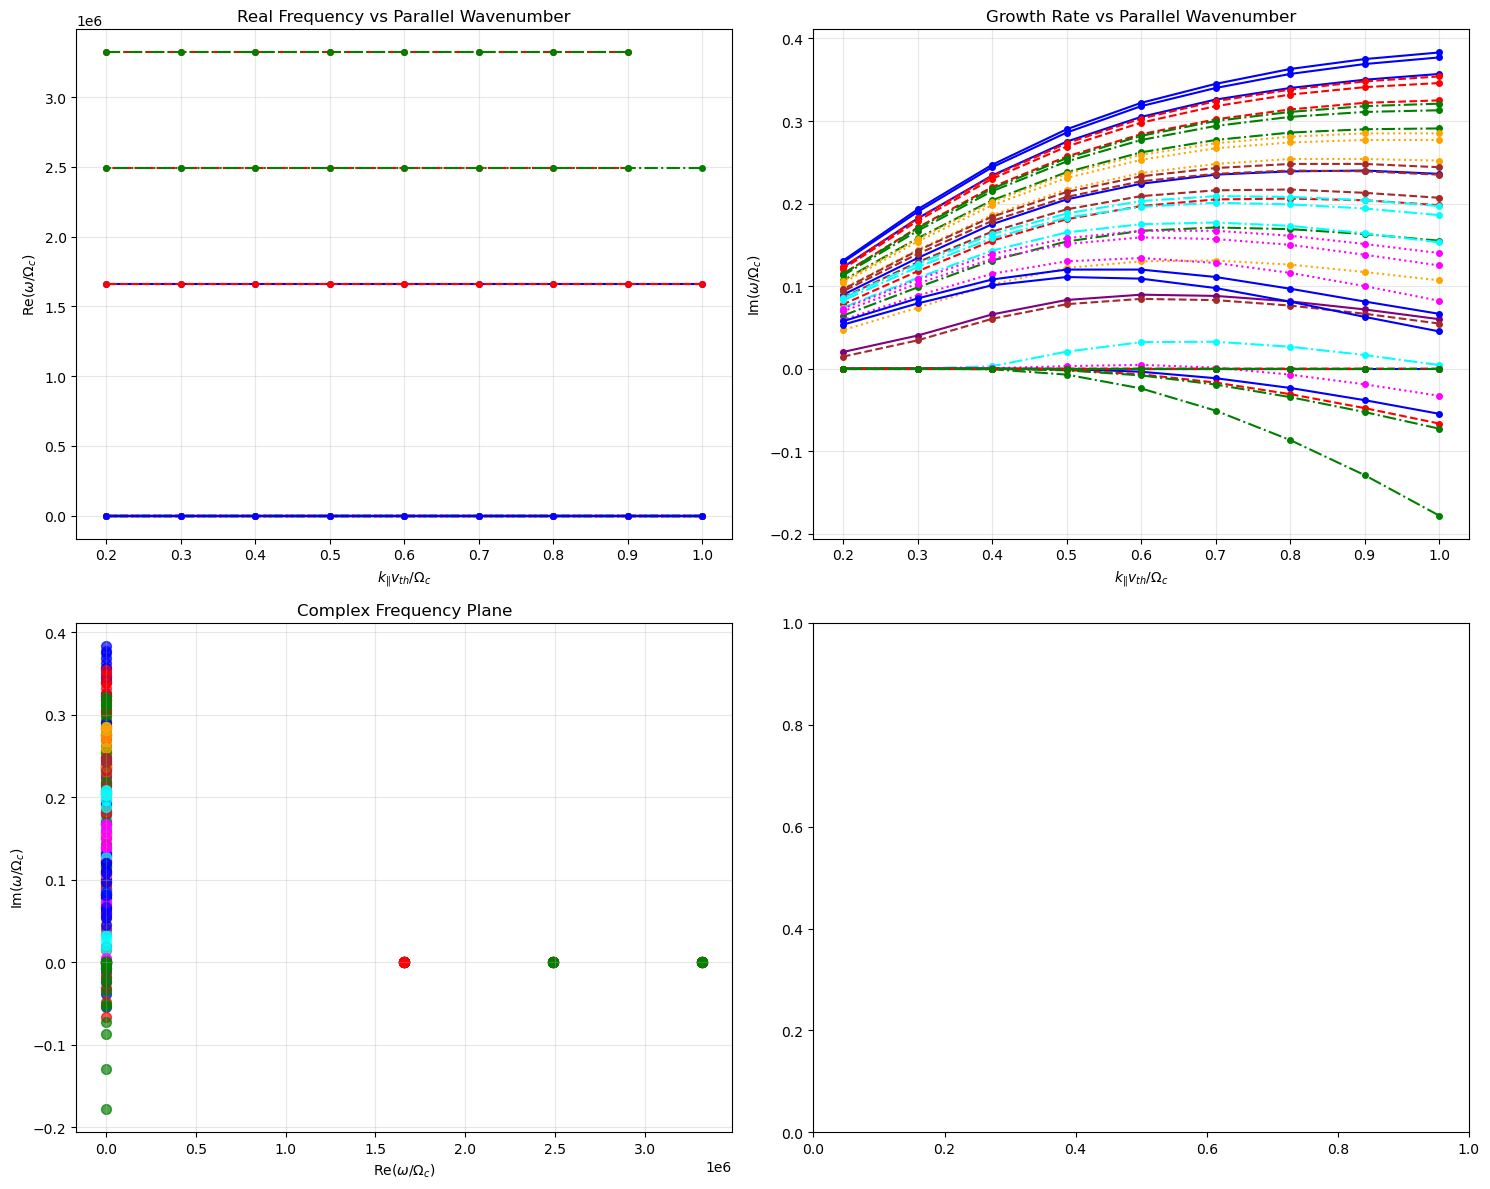

In [18]:
# Cell 5: Advanced visualization with separate lines for each A value
if df is not None:
    # Get unique A values
    a_values = sorted(df['A'].unique())
    beta_values = sorted(df['BETA'].unique())
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'cyan', 'magenta']
    linestyles = ['-', '--', '-.', ':', '-', '--', '-.', ':']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Plot 1: Real frequency vs z for different A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            axes[0, 0].plot(subset['z'], subset['omega_r'], 
                        color=colors[i % len(colors)], 
                        linestyle=linestyles[i % len(linestyles)],
                        marker='o', markersize=4, 
                        label=f'A = {a_val} & BETA = {beta_val}')
    
    axes[0, 0].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[0, 0].set_ylabel(r'$\mathrm{Re}(\omega/\Omega_c)$')
    axes[0, 0].set_title('Real Frequency vs Parallel Wavenumber')
    axes[0, 0].grid(True, alpha=0.3)
    #axes[0, 0].legend()
    
    # Plot 2: Imaginary frequency (growth rate) vs z for different A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            axes[0, 1].plot(subset['z'], subset['omega_i'], 
                        color=colors[i % len(colors)], 
                        linestyle=linestyles[i % len(linestyles)],
                        marker='o', markersize=4, 
                        label=f'A = {a_val} & BETA = {beta_val}')
    axes[0, 1].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[0, 1].set_ylabel(r'$\mathrm{Im}(\omega/\Omega_c)$')
    axes[0, 1].set_title('Growth Rate vs Parallel Wavenumber')
    axes[0, 1].grid(True, alpha=0.3)
    #axes[0, 1].legend()
    
    # Plot 3: Complex frequency plane with different colors for A values
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            scatter = axes[1, 0].scatter(subset['omega_r'], subset['omega_i'], 
                                    c=colors[i % len(colors)], 
                                    s=50, alpha=0.7,
                                    label=f'A = {a_val} & BETA = {beta_val}')
    
    axes[1, 0].set_xlabel(r'$\mathrm{Re}(\omega/\Omega_c)$')
    axes[1, 0].set_ylabel(r'$\mathrm{Im}(\omega/\Omega_c)$')
    axes[1, 0].set_title('Complex Frequency Plane')
    axes[1, 0].grid(True, alpha=0.3)
    #axes[1, 0].legend()
    
    # Plot 4: Growth rate comparison at specific k_parallel values
    # Find common z values (or interpolate)
    z_common = np.linspace(df['z'].min(), df['z'].max(), 50)
    """
    for j, beta_val in enumerate(beta_values):
        for i, a_val in enumerate(a_values):
            subset = df[(df['A'] == a_val) & (df['BETA'] == beta_val)]
            # Interpolate growth rate for common z values
            omega_i_interp = np.interp(z_common, subset['z'], subset['omega_i'])
            axes[1, 1].plot(z_common, omega_i_interp, 
                           color=colors[i % len(colors)], 
                           linestyle=linestyles[i % len(linestyles)],
                           linewidth=2, 
                           label=f'A = {a_val} & BETA = {beta_val}')
    
    axes[1, 1].axhline(y=0, color='black', linestyle=':', alpha=0.5)
    axes[1, 1].set_xlabel(r'$k_\| v_{th} / \Omega_c$')
    axes[1, 1].set_ylabel(r'$\mathrm{Im}(\omega/\Omega_c)$')
    axes[1, 1].set_title('Growth Rate Comparison (Interpolated)')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()"""
    
    plt.tight_layout()
    plt.show()